In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read data and convert categorical columns

In [2]:
# df = pd.read_csv('/kaggle/input/body-levels-train-data/body_level_classification_train.csv')
df = pd.read_csv('body_level_classification_train.csv')
df.head()

Gender        Age    Height     Weight H_Cal_Consump  Veg_Consump  \
0  Female  22.547298  1.722461  51.881263           yes     2.663421   
1    Male  19.799054  1.743702  54.927529           yes     2.000000   
2  Female  17.823438  1.708406  50.000000           yes     1.642241   
3  Female  19.007177  1.690727  49.895716           yes     1.212908   
4    Male  19.729250  1.793315  58.195150           yes     2.508835   

   Water_Consump Alcohol_Consump Smoking  Meal_Count Food_Between_Meals  \
0       1.041110              no      no    3.000000         Frequently   
1       2.847264       Sometimes      no    3.289260          Sometimes   
2       1.099231       Sometimes      no    3.452590          Sometimes   
3       1.029703       Sometimes      no    3.207071          Sometimes   
4       2.076933              no      no    3.435905          Sometimes   

  Fam_Hist H_Cal_Burn  Phys_Act  Time_E_Dev              Transport  \
0      yes         no  0.794402    1.391948  Public_Transportation   
1      yes         no  1.680844    2.000000  Public_Transportation   
2       no         no  0.418875    1.000000  Public_Transportation   
3       no         no  2.000000    1.000000  Public_Transportation   
4      yes         no  2.026668    1.443328             Automobile   

     Body_Level  
0  Body Level 1  
1  Body Level 1  
2  Body Level 1  
3  Body Level 1  
4  Body Level 1

In [3]:
df.describe()

Age       Height       Weight  Veg_Consump  Water_Consump  \
count  1477.000000  1477.000000  1477.000000  1477.000000    1477.000000   
mean     24.290420     1.701602    86.542290     2.421912       2.005120   
std       6.323081     0.094654    26.278277     0.540711       0.620307   
min      15.000000     1.456346    39.000000     1.000000       1.000000   
25%      19.895877     1.629194    65.000000     2.000000       1.549931   
50%      22.720449     1.701284    82.636162     2.416044       2.000000   
75%      26.000000     1.770278   106.690530     3.000000       2.482933   
max      55.246250     1.980000   173.000000     3.000000       3.000000   

        Meal_Count     Phys_Act   Time_E_Dev  
count  1477.000000  1477.000000  1477.000000  
mean      2.682104     1.023106     0.650672  
std       0.790751     0.844840     0.605199  
min       1.000000     0.000000     0.000000  
25%       2.644692     0.145687     0.000000  
50%       3.000000     1.000000     0.616045  
75%       3.000000     1.672639     1.000000  
max       4.000000     3.000000     2.000000

In [4]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [5]:
df_coded_values = df.copy()
for col in df.columns:
    if df_coded_values[col].dtype == 'object':
        df_coded_values[col] = df_coded_values[col].astype('category').cat.codes

In [6]:
df_coded_values.head()

Gender        Age    Height     Weight  H_Cal_Consump  Veg_Consump  \
0       0  22.547298  1.722461  51.881263              1     2.663421   
1       1  19.799054  1.743702  54.927529              1     2.000000   
2       0  17.823438  1.708406  50.000000              1     1.642241   
3       0  19.007177  1.690727  49.895716              1     1.212908   
4       1  19.729250  1.793315  58.195150              1     2.508835   

   Water_Consump  Alcohol_Consump  Smoking  Meal_Count  Food_Between_Meals  \
0       1.041110                3        0    3.000000                   1   
1       2.847264                2        0    3.289260                   2   
2       1.099231                2        0    3.452590                   2   
3       1.029703                2        0    3.207071                   2   
4       2.076933                3        0    3.435905                   2   

   Fam_Hist  H_Cal_Burn  Phys_Act  Time_E_Dev  Transport  Body_Level  
0         1           0  0.794402    1.391948          3           0  
1         1           0  1.680844    2.000000          3           0  
2         0           0  0.418875    1.000000          3           0  
3         0           0  2.000000    1.000000          3           0  
4         1           0  2.026668    1.443328          0           0

# Analysis the data

- ## visualization

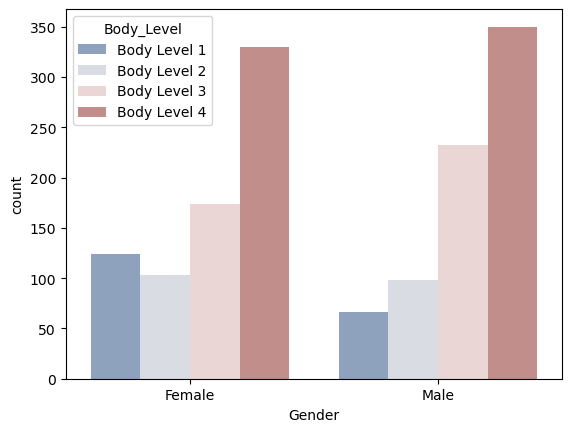

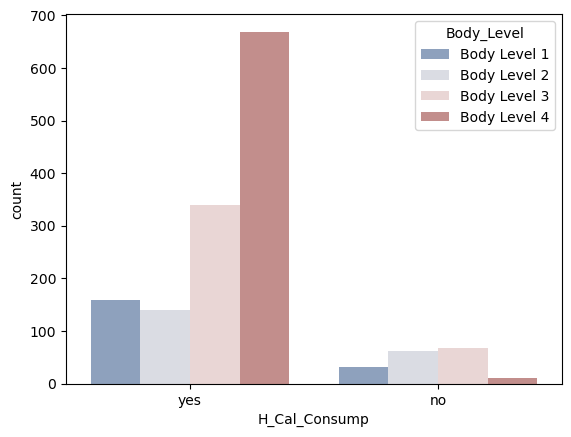

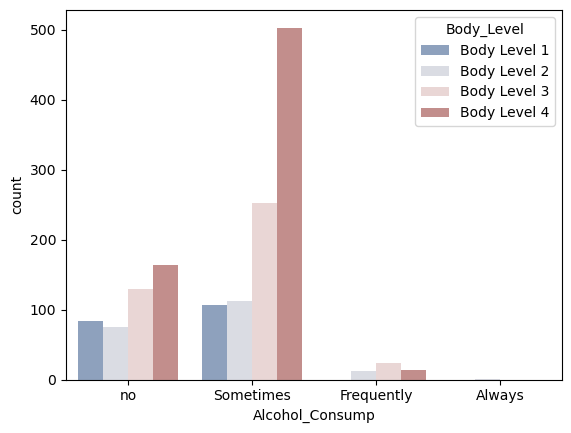

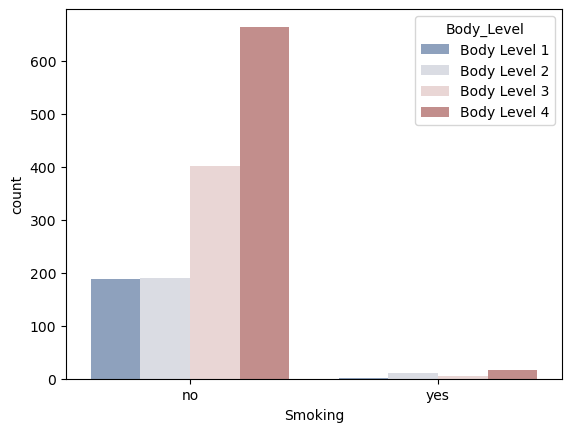

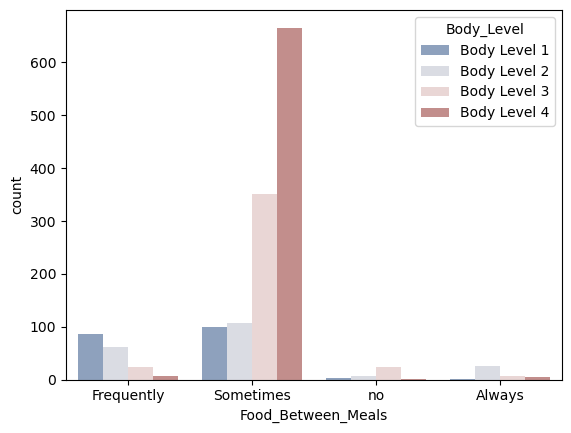

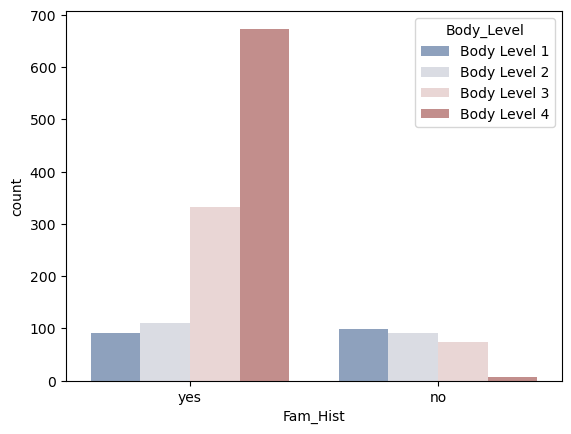

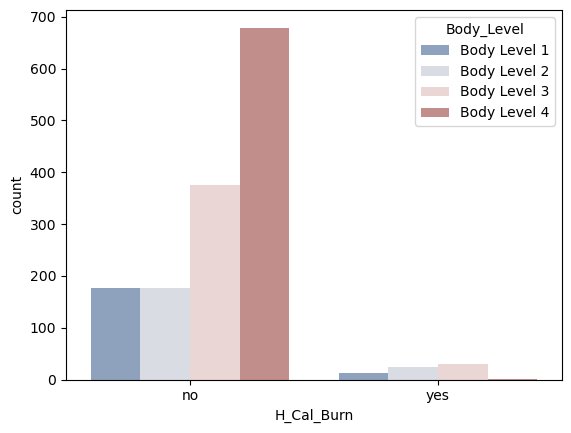

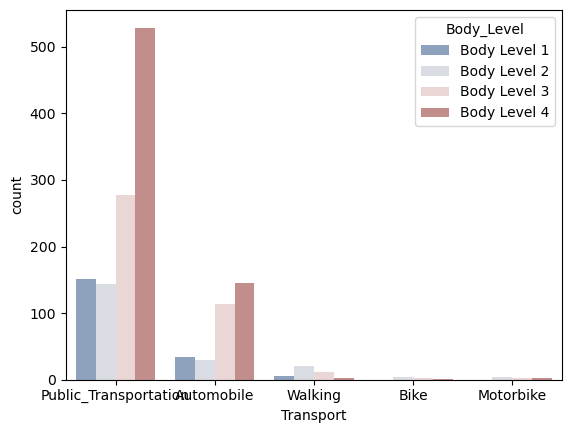

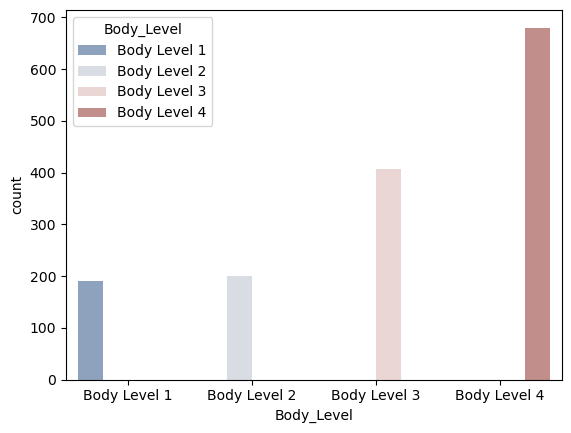

In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(x = col, data = df, hue = 'Body_Level', palette='vlag')
        plt.show()

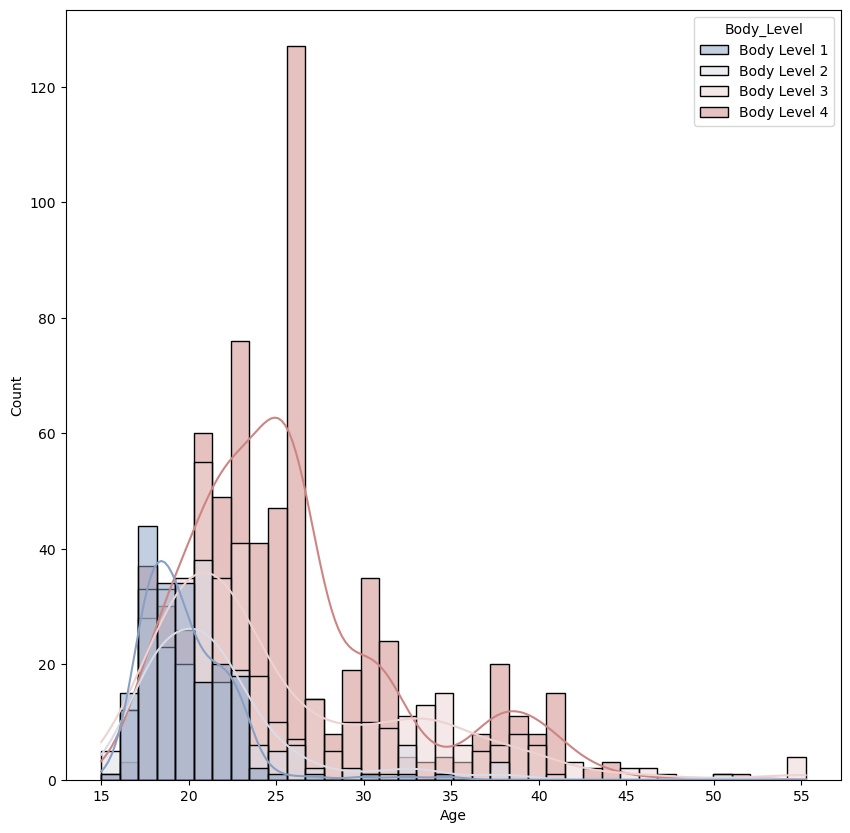

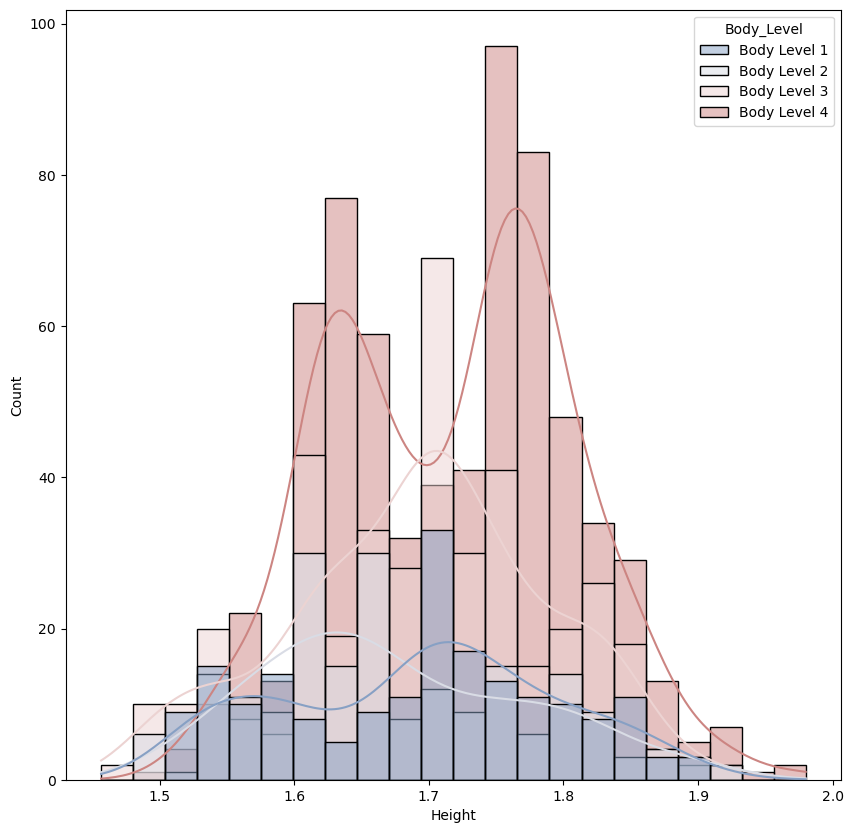

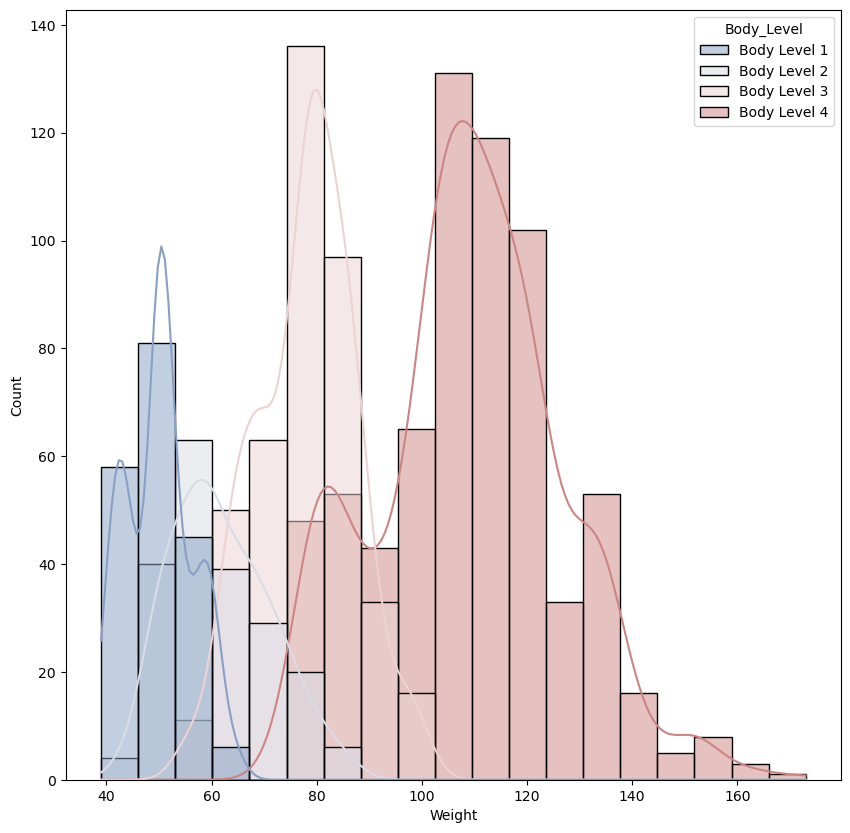

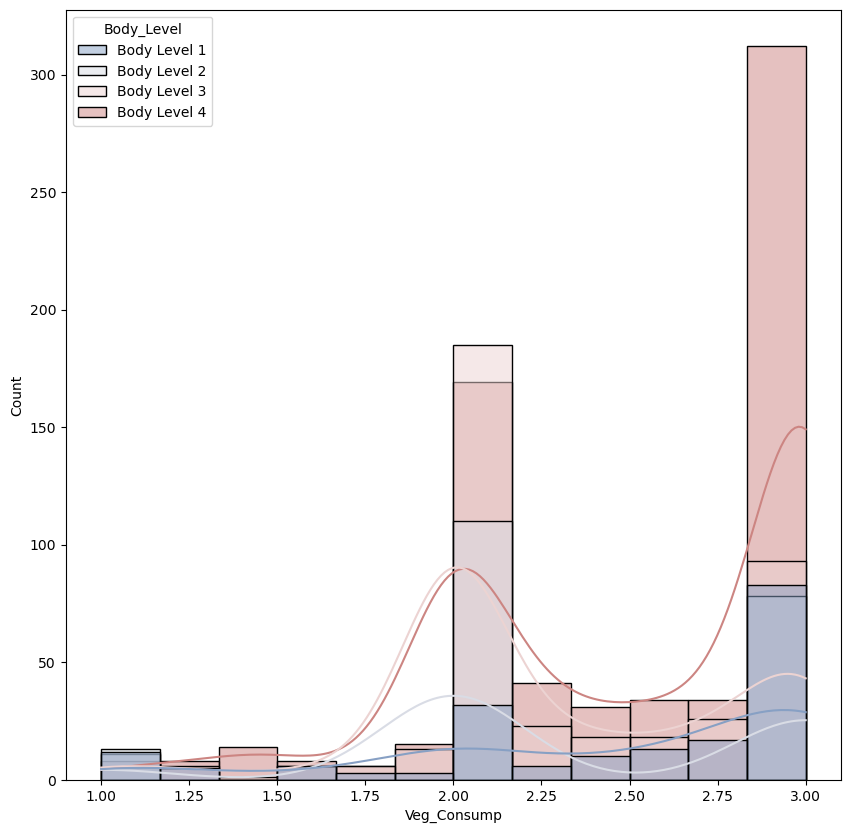

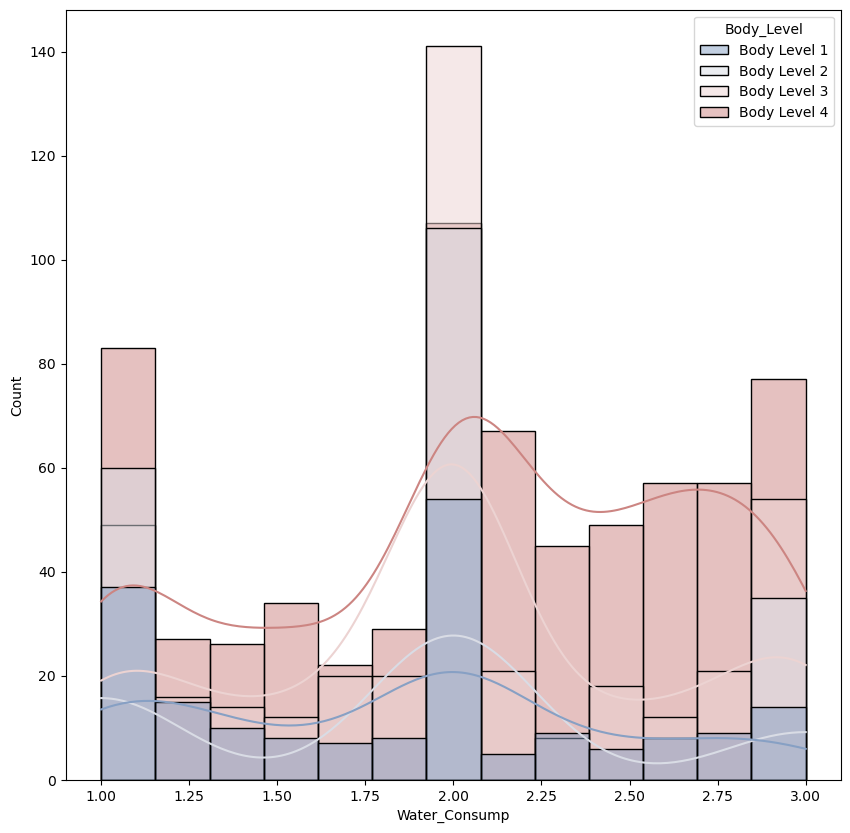

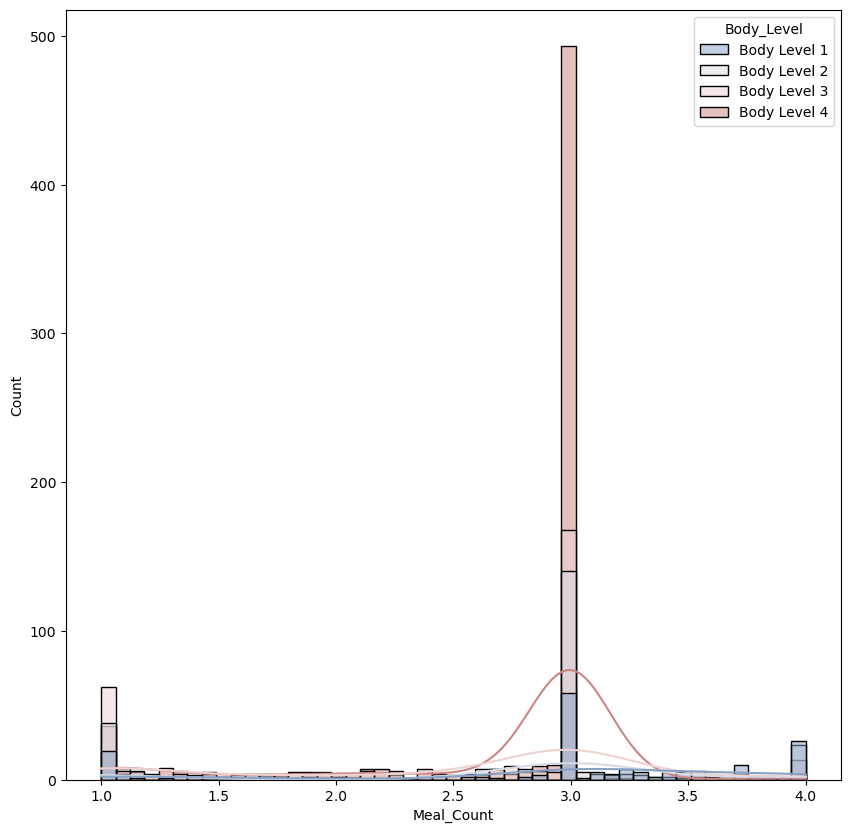

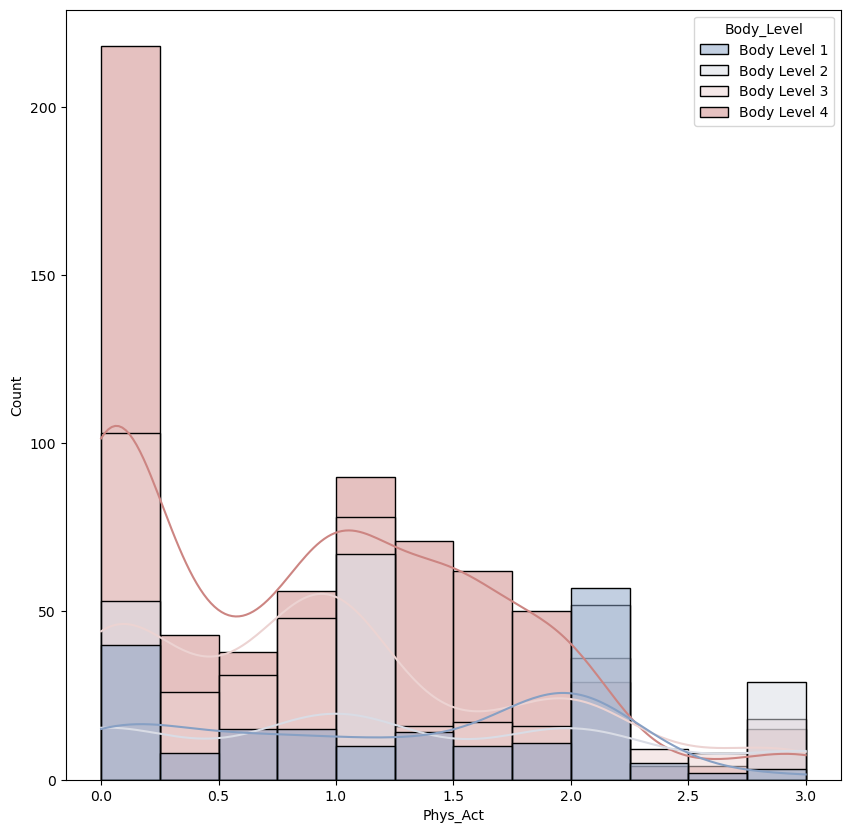

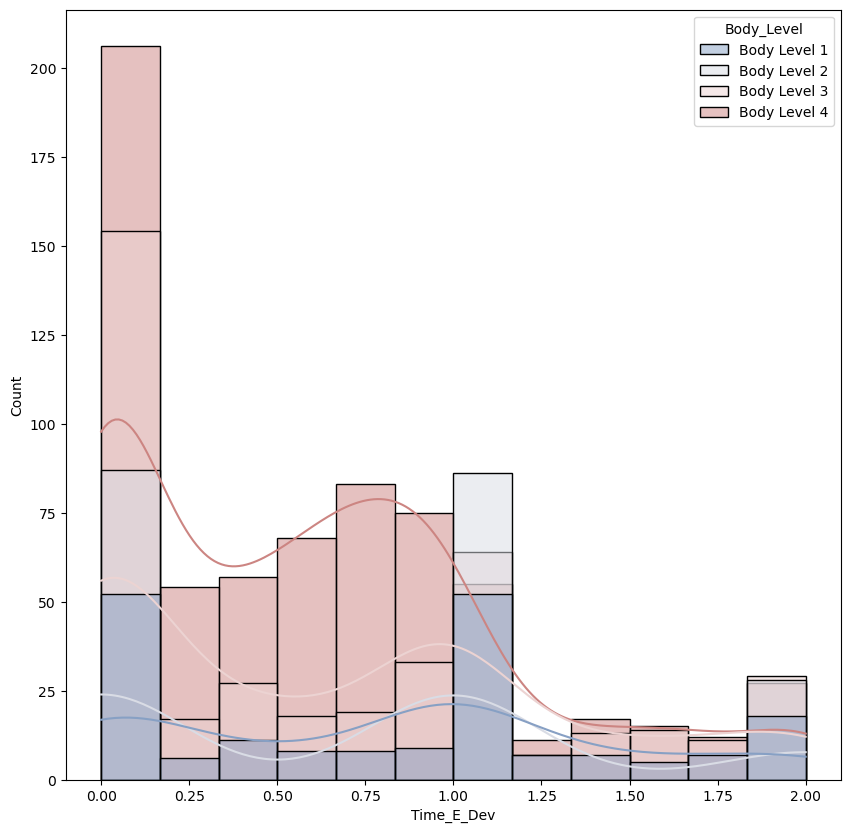

In [18]:
# plot histogram of numeric columns
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(10,10))
        sns.histplot(data = df, x = col, hue = 'Body_Level', kde=True, palette='vlag')
        plt.show()

- ## statistical

In [9]:
print('zeroR algorithm to predict the most frequent class')
most_frequent_class = df['Body_Level'].value_counts().idxmax()
print('the most frequent class is: ', most_frequent_class)
print('accuracy for predict', most_frequent_class, 'is:', df[df['Body_Level'] == most_frequent_class].value_counts().sum()/df.shape[0])

zeroR algorithm to predict the most frequent class
the most frequent class is:  Body Level 4
accurecy for predict Body Level 4 is: 0.46039268788083954


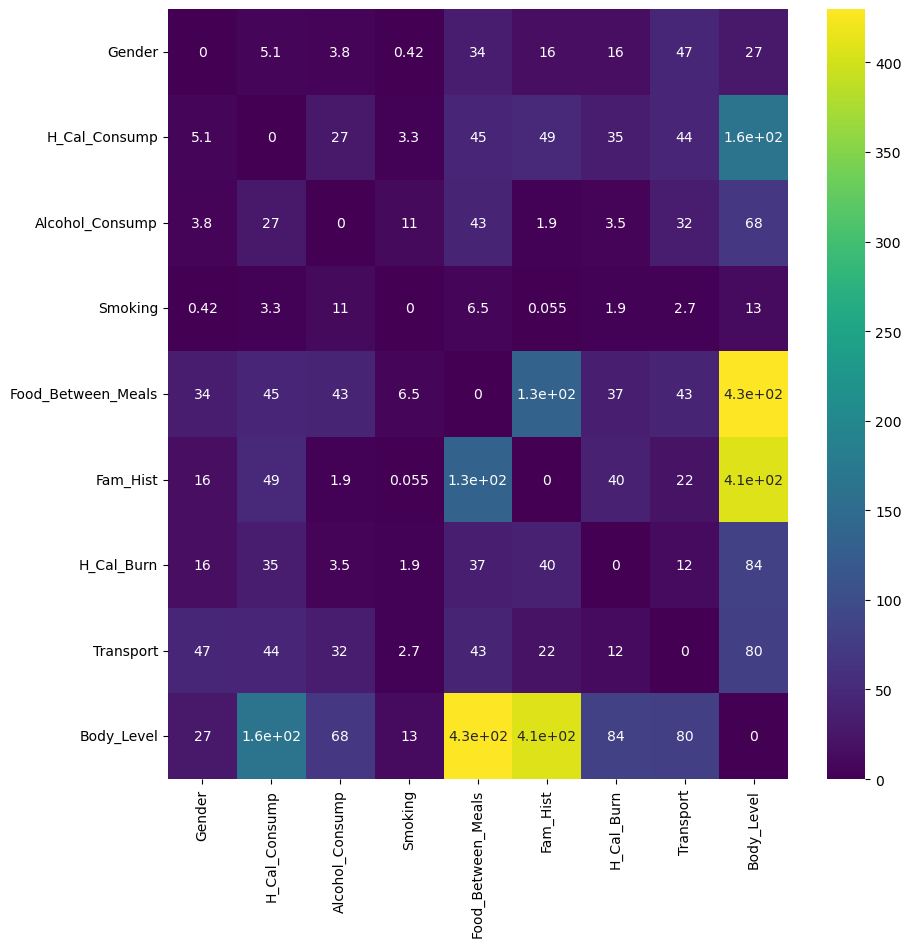

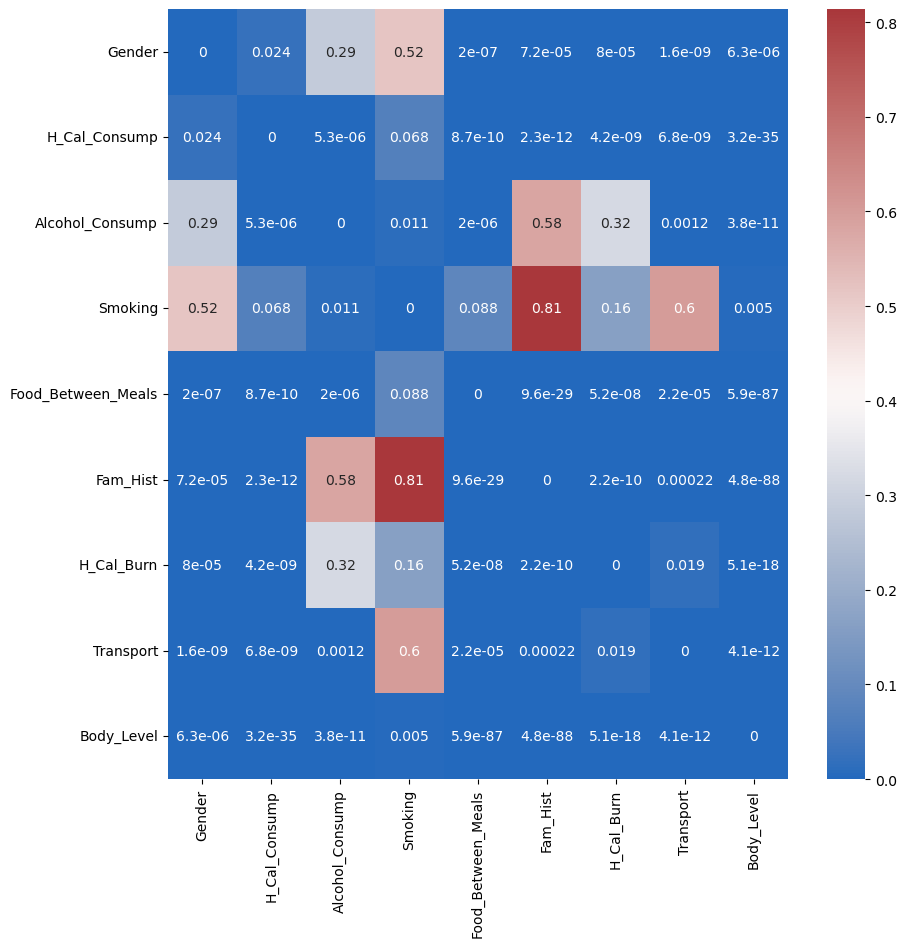

In [17]:
from scipy.stats import chi2_contingency
# get catigorical columns
categorical_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
chi2_test_prob = pd.DataFrame(columns=categorical_columns)
chi2_test_results = pd.DataFrame(columns=categorical_columns)
for column1 in categorical_columns:
    ps = []
    chi2s = []
    for column2 in categorical_columns:
        p = 0
        chi2 = 0
        if column1 != column2:
            table = pd.crosstab(df[column1], df[column2])
            chi2, p, dof, ex = chi2_contingency(table, lambda_='log-likelihood')
        ps.append(p)
        chi2s.append(chi2)
    chi2_test_prob = pd.concat([chi2_test_prob, pd.DataFrame([ps], columns=categorical_columns, index=[column1])])
    chi2_test_results = pd.concat([chi2_test_results, pd.DataFrame([chi2s], columns=categorical_columns, index=[column1])])

chi2_test_results = chi2_test_results.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(chi2_test_results, annot=True, cmap="viridis")
plt.show() 

chi2_test_prob = chi2_test_prob.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(chi2_test_prob, annot=True, cmap="vlag")
plt.show() 

Text(0.5, 1.0, 'Pearson Correlation')

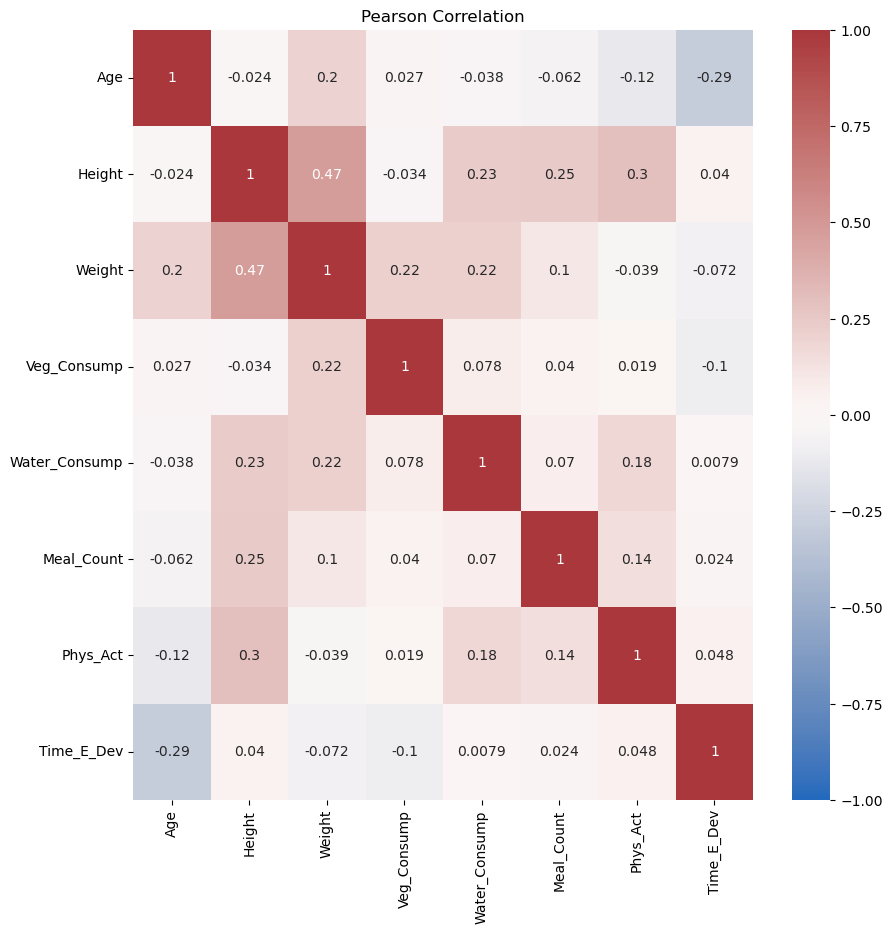

In [20]:
p = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(p, vmin=-1, 
                  vmax=1, annot=True, cmap="vlag")
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

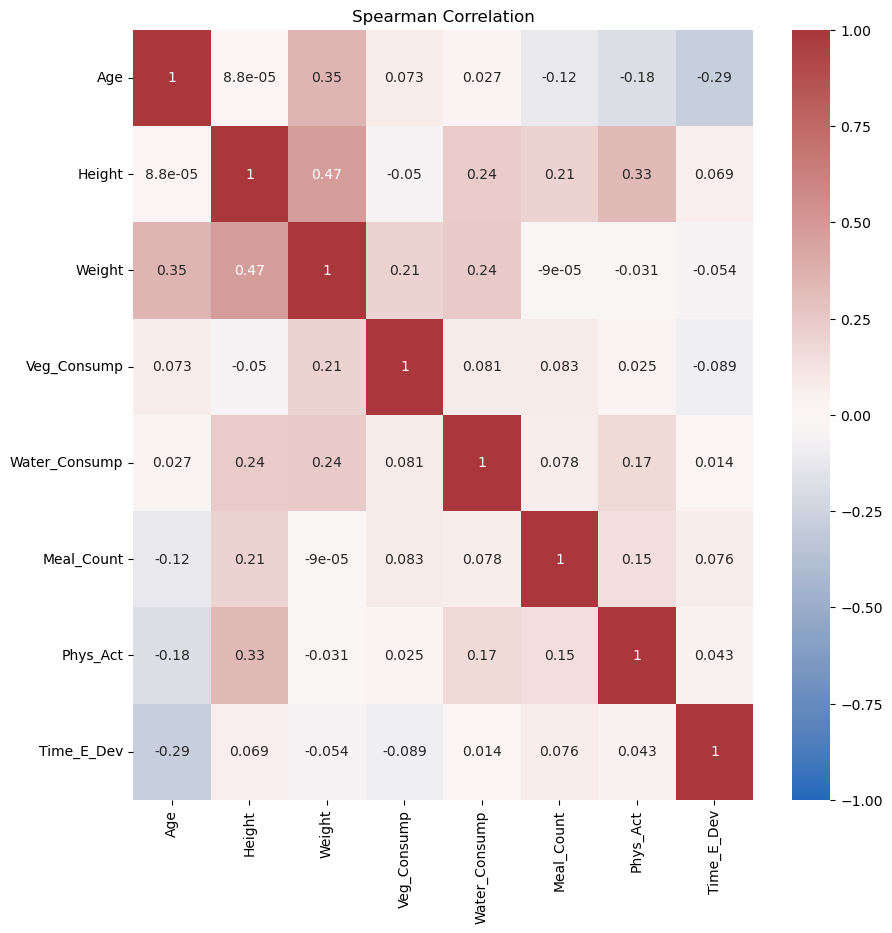

In [21]:
s = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(s, vmin=-1, 
                  vmax=1, annot=True, cmap="vlag")
plt.title("Spearman Correlation")

# Random Forest model

In [13]:
from imblearn.over_sampling import SMOTE
# Oversampling to balance the data
X = df_coded_values[df_coded_values.columns[:-1]]
y = df_coded_values[df_coded_values.columns[-1]]
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_coded_values[df_coded_values.columns[:-1]], 
                                    df_coded_values[df_coded_values.columns[-1]], random_state=13,
                                    test_size=0.30, stratify=df_coded_values[df_coded_values.columns[-1]])
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, y, test_size=0.30,stratify=y)
print(X_train.shape)
print(X_test.shape)

(1033, 16)
(444, 16)


In [73]:
from sklearn import preprocessing
# Normalized data
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
stand = preprocessing.StandardScaler()
X_train_norm = stand.fit_transform(X_train_norm)
X_test_norm = stand.fit_transform(X_test_norm)

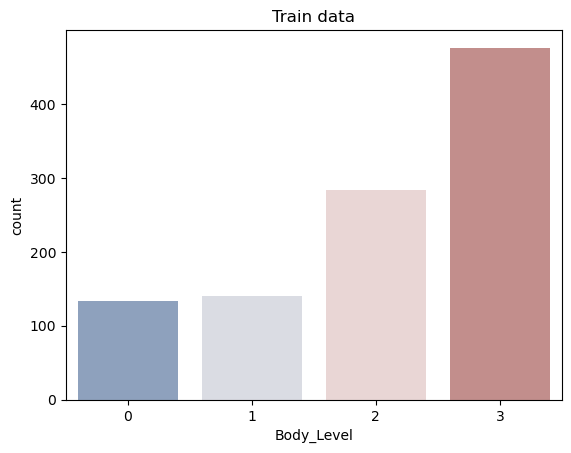

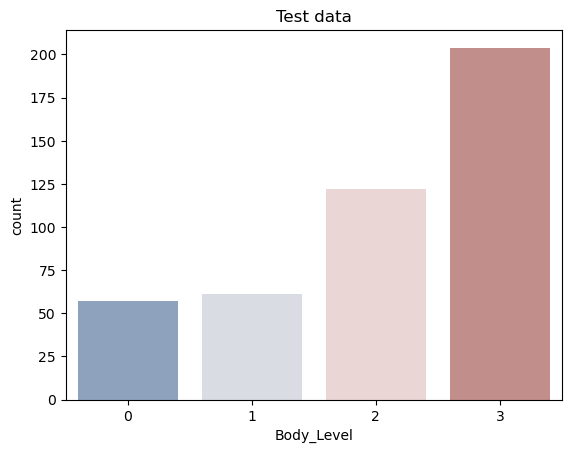

In [74]:
# plot count plot for train and test data to check if the data is stratified
plt.figure()
sns.countplot(x = y_train, palette='vlag')
plt.title('Train data')
plt.show()

plt.figure()
sns.countplot(x = y_test, palette='vlag')
plt.title('Test data')
plt.show()

### comment on splitting data
- we use 70% - 30% training and validation as recommended also we try 80% - 20% but it didn't give a good estimate 
- also, we use the stratify parameter to split data with the original distribution which makes the model train better as it sees the original distribution.
- tring SMOTE improve accuracy.
- normalizing the data didn't perform well.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0, criterion="entropy", class_weight="balanced"
                             , max_features=None, max_samples=0.5, oob_score=True)
clf.fit(X_train, y_train)
# calculate classification report
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('accuracy score on train set: ', accuracy_score(y_train, y_train_pred))
print('accuracy score on validation set: ', accuracy_score(y_test, y_test_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('classification report: \n', classification_report(y_test, y_test_pred))

accuracy score on train set:  0.989351403678606
accuracy score on validation set:  0.9662162162162162
confusion matrix: 
 [[ 57   0   0   0]
 [  3  53   5   0]
 [  0   4 115   3]
 [  0   0   0 204]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.93      0.87      0.90        61
           2       0.96      0.94      0.95       122
           3       0.99      1.00      0.99       204

    accuracy                           0.97       444
   macro avg       0.96      0.95      0.95       444
weighted avg       0.97      0.97      0.97       444



In [76]:
clf = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0, criterion="entropy", class_weight="balanced"
                             , max_features=None, max_samples=0.5, oob_score=True)
clf.fit(X_train_SMOTE, y_train_SMOTE)
# calculate classification report
y_train_pred = clf.predict(X_train_SMOTE)
y_test_pred = clf.predict(X_test_SMOTE)
print('accuracy score on train set: ', accuracy_score(y_train_SMOTE, y_train_pred))
print('accuracy score on validation set: ', accuracy_score(y_test_SMOTE, y_test_pred))
print('confusion matrix: \n', confusion_matrix(y_test_SMOTE, y_test_pred))
print('classification report: \n', classification_report(y_test_SMOTE, y_test_pred))

accuracy score on train set:  0.9947478991596639
accuracy score on validation set:  0.9877450980392157
confusion matrix: 
 [[203   1   0   0]
 [  5 198   1   0]
 [  0   1 202   1]
 [  0   0   1 203]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       204
           1       0.99      0.97      0.98       204
           2       0.99      0.99      0.99       204
           3       1.00      1.00      1.00       204

    accuracy                           0.99       816
   macro avg       0.99      0.99      0.99       816
weighted avg       0.99      0.99      0.99       816



In [77]:
clf = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0, criterion="entropy", class_weight="balanced"
                             , max_features=None, max_samples=0.5, oob_score=True)
clf.fit(X_train_norm, y_train)
# calculate classification report
y_train_pred = clf.predict(X_train_norm)
y_test_pred = clf.predict(X_test_norm)
print('accuracy score on train set: ', accuracy_score(y_train, y_train_pred))
print('accuracy score on validation set: ', accuracy_score(y_test, y_test_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('classification report: \n', classification_report(y_test, y_test_pred))


accuracy score on train set:  0.989351403678606
accuracy score on validation set:  0.9504504504504504
confusion matrix: 
 [[ 57   0   0   0]
 [  8  47   6   0]
 [  0   3 114   5]
 [  0   0   0 204]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        57
           1       0.94      0.77      0.85        61
           2       0.95      0.93      0.94       122
           3       0.98      1.00      0.99       204

    accuracy                           0.95       444
   macro avg       0.94      0.93      0.93       444
weighted avg       0.95      0.95      0.95       444



### comment on Random Forest Model
- max_depth and n_estimators: I use trial and error to get the suitable value; to get these values, I compare between training error and validation error and stopped when the validation error decreases again. Also considering data size I try to limit the values to don't overfit. 
- criterion: using log_loss or entropy error function provide the same accuracy and is better than gini. It is because the log function has a range [0: 1] but gini has a range [0: 1-p]
- class_weight: using balanced because the data is unbalanced. 
- max_features: None was the good choice here hance number of features isn't huge.
- bootstrap: True as default is more efficient because each tree will see the part from the data and learn patterns from it and in the end take an average from trees.
- max_samples: each tree can be trained on half of the data; the value came with try and error.
- oob_score: it didn't affect the model, but I set it to True because that out-of-bag is a good estimate for out-of-sample error.
- random_state: just try and error.

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, max_depth=12, random_state=10,
                                        criterion="entropy", class_weight="balanced", max_features=None, max_samples=0.5))

# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)
scores = cross_val_score(pipeline, X=X, y=y, cv=skf, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
# calculate classification report for cross validation
y_pred = cross_val_predict(pipeline, X=X, y=y, cv=skf, n_jobs=1)
print('classification report: \n', classification_report(y, y_pred))

Cross Validation accuracy scores: [0.98161765 0.99264706 0.98529412 0.98897059 0.97794118 0.99632353
 0.96323529 0.98897059 0.98529412 0.97426471]
Cross Validation accuracy: 0.983 +/- 0.009
classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       680
           1       0.98      0.97      0.98       680
           2       0.97      0.99      0.98       680
           3       1.00      0.98      0.99       680

    accuracy                           0.98      2720
   macro avg       0.98      0.98      0.98      2720
weighted avg       0.98      0.98      0.98      2720



### comment on Cross Validation
- using stratified data will be split into parts with the same original data distribution.
- cross-validation helps us to get the average of model accuracy, this prevents overfitting; because we trained K models and average them.

In [21]:
# Extract single tree
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_coded_values.columns[:-1],
                class_names = df_coded_values.columns[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')